## 1. Introduction

This Exploratory Data Analysis (EDA) aims to understand the structure,
quality, and main characteristics of the retail sales dataset.

The objective is to identify patterns, relationships, and potential issues
that will guide feature engineering and model selection in later stages of
the project.


In [1]:
#!pip install pandas numpy matplotlib seaborn scikit-learn


## Dataset Loading and Initial Overview

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
plt.rcParams["figure.figsize"] = (10,5)


### Load dataset 

In [4]:
import pandas as pd

df = pd.read_csv(
    "/Users/helenagomez/Documents/ironHack/retail-data-platform-final-project/data/raw/stores_sales_forecasting.csv",
    encoding="latin1"
)

df.head()




,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## General Dataset Information

In [5]:
df.shape

(9800, 18)

#### Dataset Size

The dataset contains a total number of observations 9800 and features 18.
This provides an initial understanding of the dataset scale and complexity.


In [6]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='str')

In [7]:
df.dtypes


Row ID             int64
Order ID             str
Order Date           str
Ship Date            str
Ship Mode            str
Customer ID          str
Customer Name        str
Segment              str
Country              str
City                 str
State                str
Postal Code      float64
Region               str
Product ID           str
Category             str
Sub-Category         str
Product Name         str
Sales            float64
dtype: object

In [8]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [9]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   str    
 2   Order Date     9800 non-null   str    
 3   Ship Date      9800 non-null   str    
 4   Ship Mode      9800 non-null   str    
 5   Customer ID    9800 non-null   str    
 6   Customer Name  9800 non-null   str    
 7   Segment        9800 non-null   str    
 8   Country        9800 non-null   str    
 9   City           9800 non-null   str    
 10  State          9800 non-null   str    
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   str    
 13  Product ID     9800 non-null   str    
 14  Category       9800 non-null   str    
 15  Sub-Category   9800 non-null   str    
 16  Product Name   9800 non-null   str    
 17  Sales          9800 non-null   float64
dtypes: float64(2), int6

### Data Types Summary

The dataset contains a mix of numerical and categorical variables.
Most categorical features are represented as strings, while numerical
features include sales-related values.

Date columns are currently stored as strings and will be converted to
datetime format for temporal analysis.

Overall, the data types are consistent with the problem domain and suitable
for exploratory analysis and machine learning after minimal preprocessing.

## Data Cleaning and Preprocessing

In [10]:
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ','_')
)
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='str')

In [11]:
df.isnull().sum()


row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

In [12]:
print(df.isnull().sum())

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64


In [13]:
df['sales'] = df['sales'].fillna(df['sales'].median())
df.isnull().sum()


row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

### Missing Values Analysis

Initial data quality checks confirmed that the dataset contains 11 missing values in Postal code
and no duplicated records, allowing the analysis to proceed without additional
data cleaning steps and right now the dataset is well structures


In [15]:
df.describe()


,row_id,postal_code,sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [16]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['ship_date']=pd.to_datetime(df['ship_date'],dayfirst=True)
df.dtypes

row_id                    int64
order_id                    str
order_date       datetime64[us]
ship_date        datetime64[us]
ship_mode                   str
customer_id                 str
customer_name               str
segment                     str
country                     str
city                        str
state                       str
postal_code             float64
region                      str
product_id                  str
category                    str
sub-category                str
product_name                str
sales                   float64
dtype: object

## Univariate Analysis

In [17]:
from scipy.stats import skew, kurtosis

skew_value = skew(df["sales"])
kurtosis_value = kurtosis(df["sales"])

skew_value, kurtosis_value

(np.float64(12.981495512750438), np.float64(304.28916920017457))

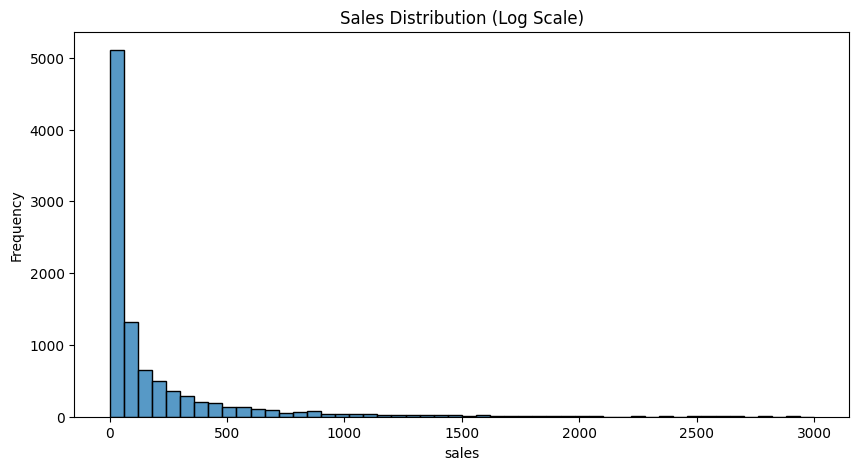

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(
    df[df["sales"] < 3000]["sales"],
    bins=50,
    edgecolor="black"
)
plt.title("Sales Distribution (Log Scale)")
plt.xlabel("sales")
plt.ylabel("Frequency")
plt.show()




In [19]:
df["sales"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


0.25      17.2480
0.50      54.4900
0.75     210.6050
0.90     575.9320
0.95     959.9840
0.99    2480.2078
Name: sales, dtype: float64

While extreme values exist, 95% of sales transactions fall below the upper percentile threshold, indicating that most sales are relatively small.


In [20]:
low_sales_ratio = (df["sales"] < 100).mean()
high_sales_ratio = (df["sales"] > 1000).mean()

low_sales_ratio, high_sales_ratio


(np.float64(0.6225510204081632), np.float64(0.047142857142857146))

Most transactions correspond to low sales values, while high-value sales represent a small fraction of the data.


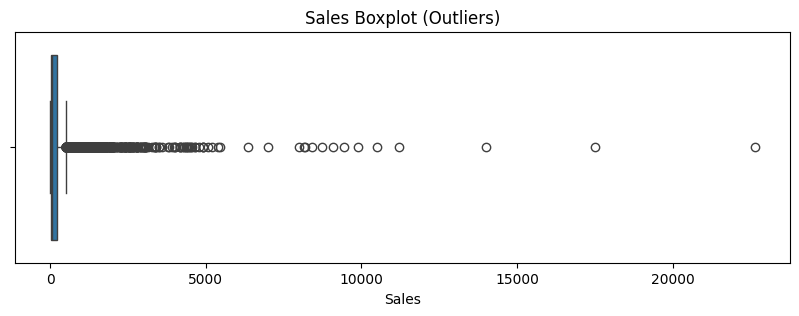

In [21]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["sales"])
plt.title("Sales Boxplot (Outliers)")
plt.xlabel("Sales")
plt.show()


In [22]:
df["sales"].describe()


count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: sales, dtype: float64

Sales show a highly right-skewed distribution, with the majority of transactions concentrated at low values.
Several extreme outliers are present, indicating occasional high-value sales.


### Stores / Locations (e.g. Region or City)

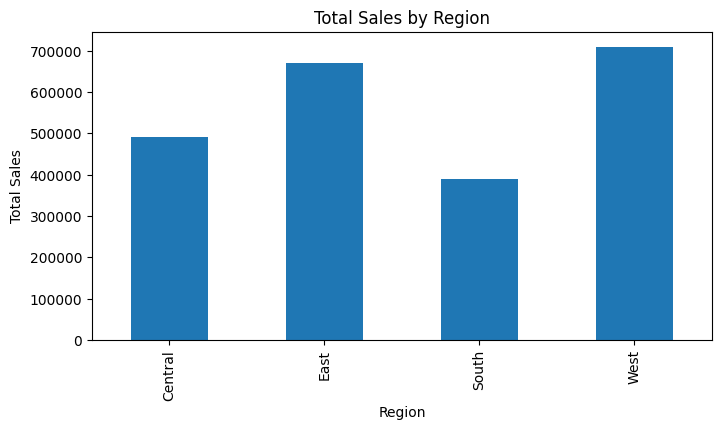

In [23]:
region_sales = df.groupby("region")["sales"].sum()

plt.figure(figsize=(8,4))
region_sales.plot(kind="bar")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


Sales are unevenly distributed across regions.
Some regions contribute significantly more to total sales, suggesting differences in demand or store performance.


In [24]:
sales_by_year =df.groupby(df["order_date"].dt.year)["sales"].sum()
sales_by_year


order_date
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: sales, dtype: float64

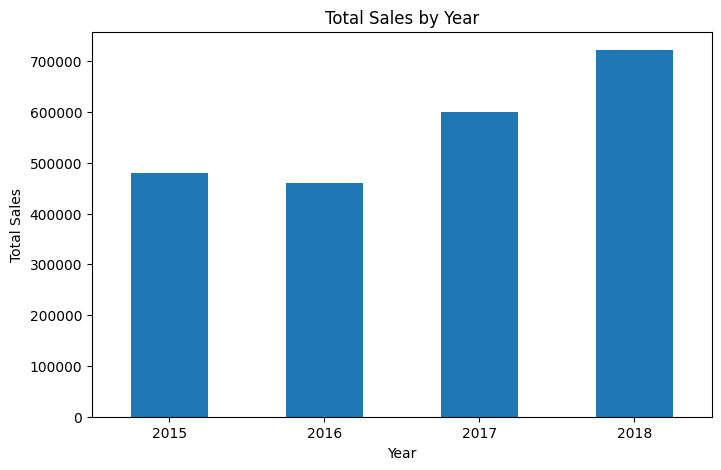

In [25]:

plt.figure(figsize=(8,5))
sales_by_year.plot(kind="bar")
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

In [26]:
monthly_sales = df.groupby(df["order_date"].dt.month)["sales"].sum()
monthly_sales

order_date
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: sales, dtype: float64

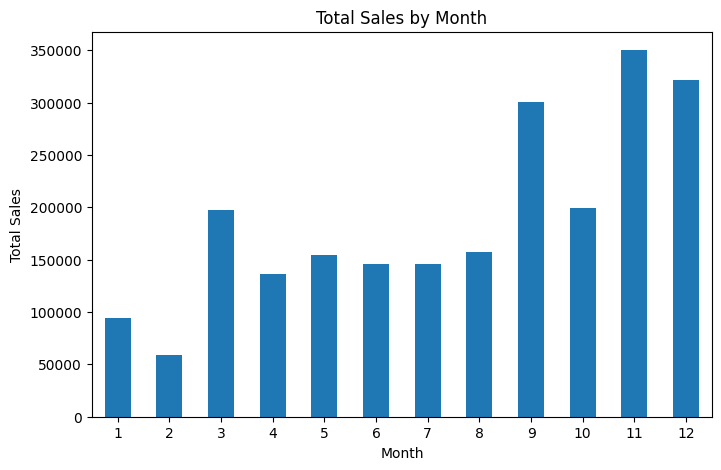

In [27]:
plt.figure(figsize=(8,5))
monthly_sales.plot(kind="bar")
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()


Sales vary significantly across months, indicating the presence of seasonal patterns even before formal time series analysis.


In [46]:
df.shape

(9800, 19)

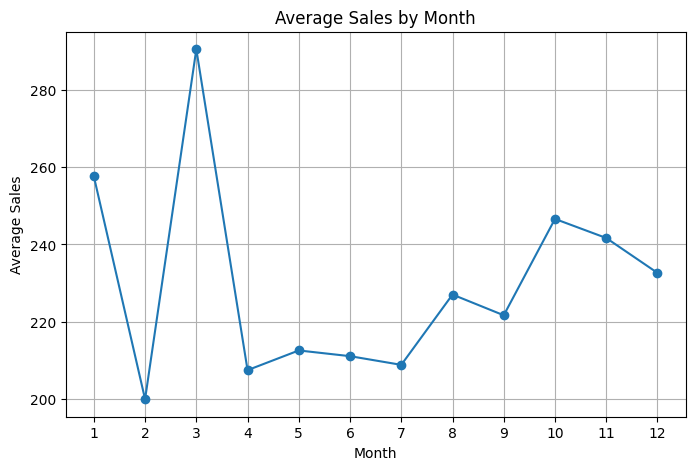

In [28]:
avg_monthly_sales = df.groupby(df["order_date"].dt.month)["sales"].mean()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
avg_monthly_sales.plot(marker="o")
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()



## Bivariable Analysis

In [29]:
cat = df.select_dtypes(exclude="number")
cat.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'region',
       'product_id', 'category', 'sub-category', 'product_name'],
      dtype='str')

In [30]:
num = df.select_dtypes(include="number")
num.columns

Index(['row_id', 'postal_code', 'sales'], dtype='str')

In [34]:
# Crear variable derivada
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

# Verificar tipos
df.dtypes


row_id                    int64
order_id                    str
order_date       datetime64[us]
ship_date        datetime64[us]
ship_mode                   str
customer_id                 str
customer_name               str
segment                category
country                     str
city                        str
state                       str
postal_code             float64
region                      str
product_id                  str
category                    str
sub-category                str
product_name                str
sales                   float64
shipping_days             int64
dtype: object

### Categorical vs Categorical

In [39]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,shipping_days
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


#### crosstab
* segment by region

In [35]:
from scipy.stats import chi2_contingency

# Crosstab
ct_segment_region = pd.crosstab(df['segment'], df['region'])
ct_segment_region


region,Central,East,South,West
segment,,,,
Consumer,1188,1444,831,1638
Corporate,661,850,500,942
Home Office,428,491,267,560


* category by sub category

In [40]:
ct_category_sub = pd.crosstab(df['category'], df['sub-category'])
ct_category_sub

sub-category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,226,607,0,0,0,931,0,0,0,0,0,0,314
Office Supplies,0,459,785,1492,0,0,0,248,214,0,357,0,1338,0,832,184,0
Technology,756,0,0,0,0,0,66,0,0,0,0,115,0,876,0,0,0


In [36]:
# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(ct_segment_region)

# Cramér's V
n = ct_segment_region.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct_segment_region.shape) - 1)))

p_value, cramers_v


(np.float64(0.6486157291560661), np.float64(0.014651606019638186))

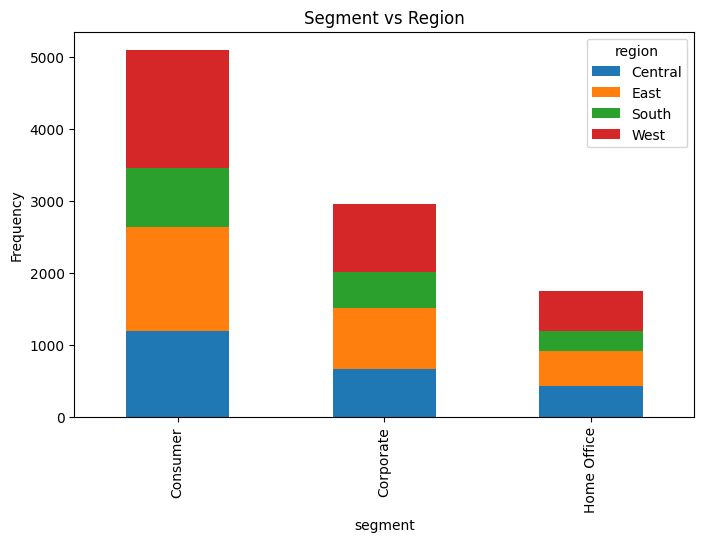

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stacked bar chart
ct_segment_region.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Segment vs Region')
plt.ylabel('Frequency')
plt.show()


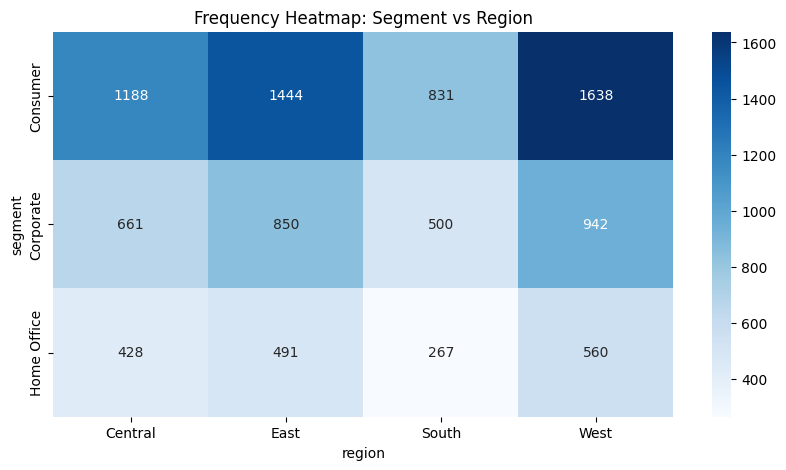

In [38]:
# Heatmap de frecuencias
sns.heatmap(ct_segment_region, annot=True, fmt='d', cmap='Blues')
plt.title('Frequency Heatmap: Segment vs Region')
plt.show()


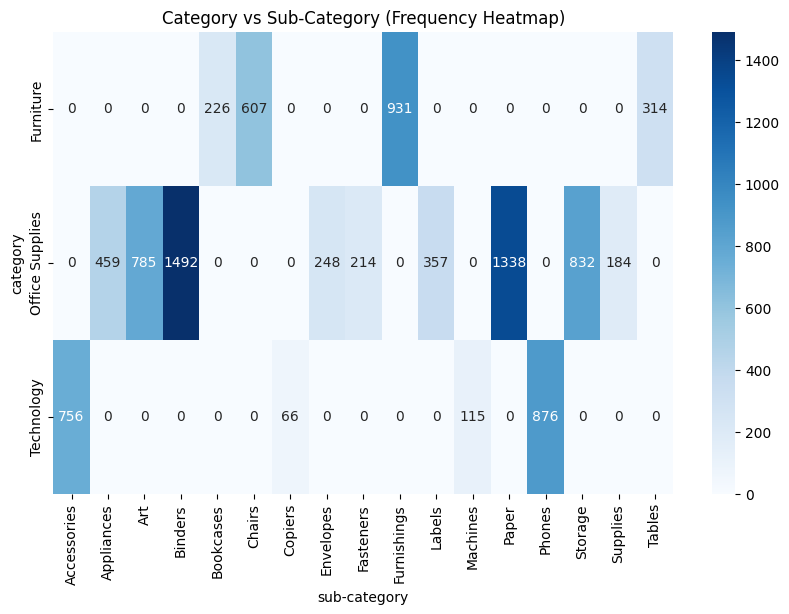

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(ct_category_sub, annot=True, fmt='d', cmap='Blues')
plt.title('Category vs Sub-Category (Frequency Heatmap)')
plt.show()

### Categorical vs Continuous

In [42]:
df.groupby('category')['sales'].describe()


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Furniture,2078.0,350.653790,501.489219,1.892,47.19,182.610,435.237,4416.174
Office Supplies,5909.0,119.381001,383.761427,0.444,11.76,27.360,79.470,9892.740
Technology,1813.0,456.401474,1116.818701,0.990,67.98,167.944,453.576,22638.480


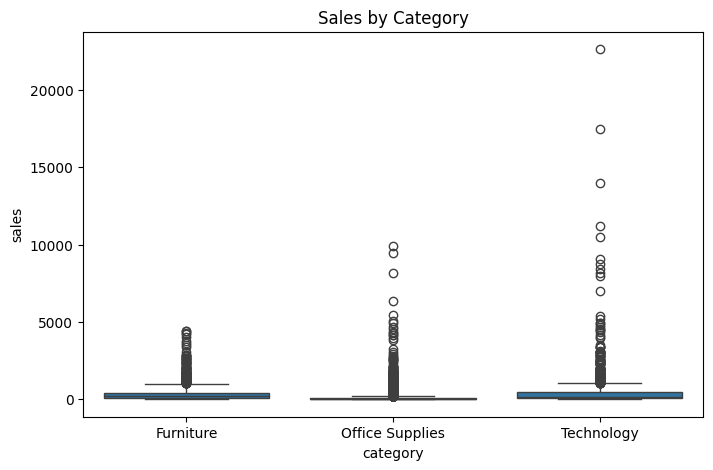

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='category', y='sales', data=df)
plt.title('Sales by Category')
plt.show()


In [51]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

In [53]:
features = [
    'segment', 'region', 'category', 'sub-category',
    'ship_mode', 'city', 'state'
]

In [54]:
features += ['order_year', 'order_month', 'shipping_days']


In [55]:
X = pd.get_dummies(df[features], drop_first=True)
y = df['sales']


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/helenagomez/Documents/ironHack/retail-data-platform-final-project/venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <1A0D8152-BF46-3BE0-B651-EE965C187777> /Users/helenagomez/Documents/ironHack/retail-data-platform-final-project/venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

rf_results


MAE: 241.87213270118892
R2: 0.13667152176691788
